In [24]:
import numpy as np
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

In [25]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])  # XOR

model = Sequential()
model.add((Input(shape=(2,))))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [26]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
history = model.fit(x, y, epochs=100, batch_size=1, verbose=0)
loss_metrics = model.evaluate(x, y)
print('loss_metrics')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7500 - loss: 0.5651
loss_metrics


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
예측 결과:  [1 1 1 1]
[<Variable path=sequential_4/dense_12/kernel, shape=(2, 5), dtype=float32, value=[[-0.20245527 -0.6697832  -0.22648829 -0.83985555 -0.46615285]
 [ 0.295239    0.03420339 -0.44706917 -0.61368024  0.2273257 ]]>, <Variable path=sequential_4/dense_12/bias, shape=(5,), dtype=float32, value=[-0.01568927 -0.05346896  0.          0.         -0.05346672]>, <Variable path=sequential_4/dense_13/kernel, shape=(5, 5), dtype=float32, value=[[-0.28645793  0.08702656 -0.4551353  -0.26659432 -0.48923188]
 [-0.0974052   0.12317431 -0.7354883   0.7047662  -0.7200686 ]
 [ 0.3901688   0.49452436 -0.2611581  -0.1632936   0.6438321 ]
 [-0.64235544 -0.4254355   0.3621291   0.10565627  0.69590783]
 [-0.04229778 -0.3695321  -0.39488623  0.20810561  0.259997  ]]>, <Variable path=sequential_4/dense_13/bias, shape=(5,), dtype=float32, value=[ 0.         -0.06005404  0.         -0.05346926  0.        ]>, <Variable path=sequential_4/dense_14/kernel, shape=(5, 1

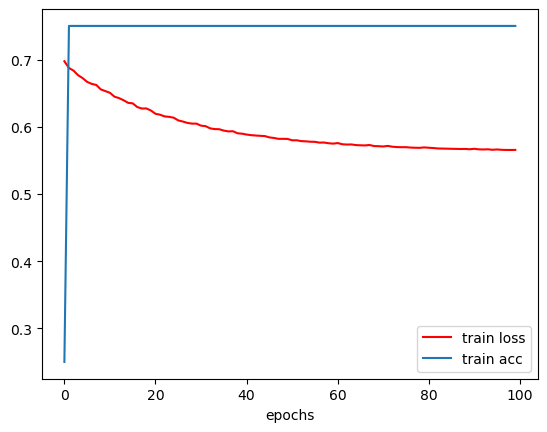

In [27]:
pred = (model.predict(x) > 0.5).astype('int32')
print('예측 결과: ', pred.ravel())

print(model.weights)

print(history.history['loss'][:10])
print(history.history['accuracy'][:10])

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], c='red', label='train loss')
plt.plot(history.history['accuracy'], label='train acc')
plt.xlabel('epochs')
plt.legend(loc='best')
plt.show()

